# Categorical Data

In this Lecture we will categorial data. We will learn how to break or explore more of the dataset even though our eyes can percieve what has been given to us. 

We will also look upon 
- Importing dataset
- Categorising dataset
- Deleting the rows with missing values
- Histogram
- mean and variance 

In [1]:
# importing our standard libraries

import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/whickham-Copy1.xls') #importing file

In [3]:
data.head() #checking the dataframe

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [4]:
data.shape #viewing the shape

(1314, 3)

In [5]:
data.describe() #viewing the statistical info

,age
count,1314.000000
mean,46.920091
std,17.432027
min,18.000000
25%,32.000000
50%,46.000000
75%,61.000000
max,84.000000


## Categorizing the dataset

- we will be using the cut method
- we use cut when we need to segment and sort data values into bins or categories. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.

In [6]:
# We make a new column 
data['ageGroup'] = pd.cut(data.age,[0,20,30,40,50,60], #making bins to categorise
                          labels=['0-20','20-30','30-40','40-60','60-70'])

In [7]:
data.head() #check the dataset again to see everything is going fine

,outcome,smoker,age,ageGroup
0,Alive,Yes,23,20-30
1,Alive,Yes,18,0-20
2,Dead,Yes,71,NaN
3,Alive,No,67,NaN
4,Alive,No,64,NaN


In [8]:
data.isnull().sum()# isnull and isna is used to check the missing values. 
                    # sum is used to see the whole number

outcome       0
smoker        0
age           0
ageGroup    343
dtype: int64

In [9]:
# groupby is used to group a particular column with another column
# this helps us to get result based on the target value
# In this case we are using outcome column in the dataset as a target to see the smoker column

bysmoker = data.groupby("smoker").outcome.value_counts(normalize=False)

In [10]:
bysmoker

smoker  outcome
No      Alive      502
        Dead       230
Yes     Alive      443
        Dead       139
Name: outcome, dtype: int64

In [11]:
#we can groupby for multiple column as well
byage = data.groupby(['ageGroup','smoker']).outcome.value_counts(normalize=False)

In [12]:
byage #thus we get this

ageGroup  smoker  outcome
0-20      No      Alive       29
                  Dead         1
          Yes     Alive       23
                  Dead         1
20-30     No      Alive      133
                  Dead         2
          Yes     Alive       97
                  Dead         2
30-40     No      Alive      128
                  Dead         6
          Yes     Alive      111
                  Dead         7
40-60     No      Alive       72
                  Dead        11
          Yes     Alive      106
                  Dead        22
60-70     No      Alive       78
                  Dead        30
          Yes     Alive       69
                  Dead        43
Name: outcome, dtype: int64

# Plotting the graph

Text(0.5, 1.0, 'smoker')

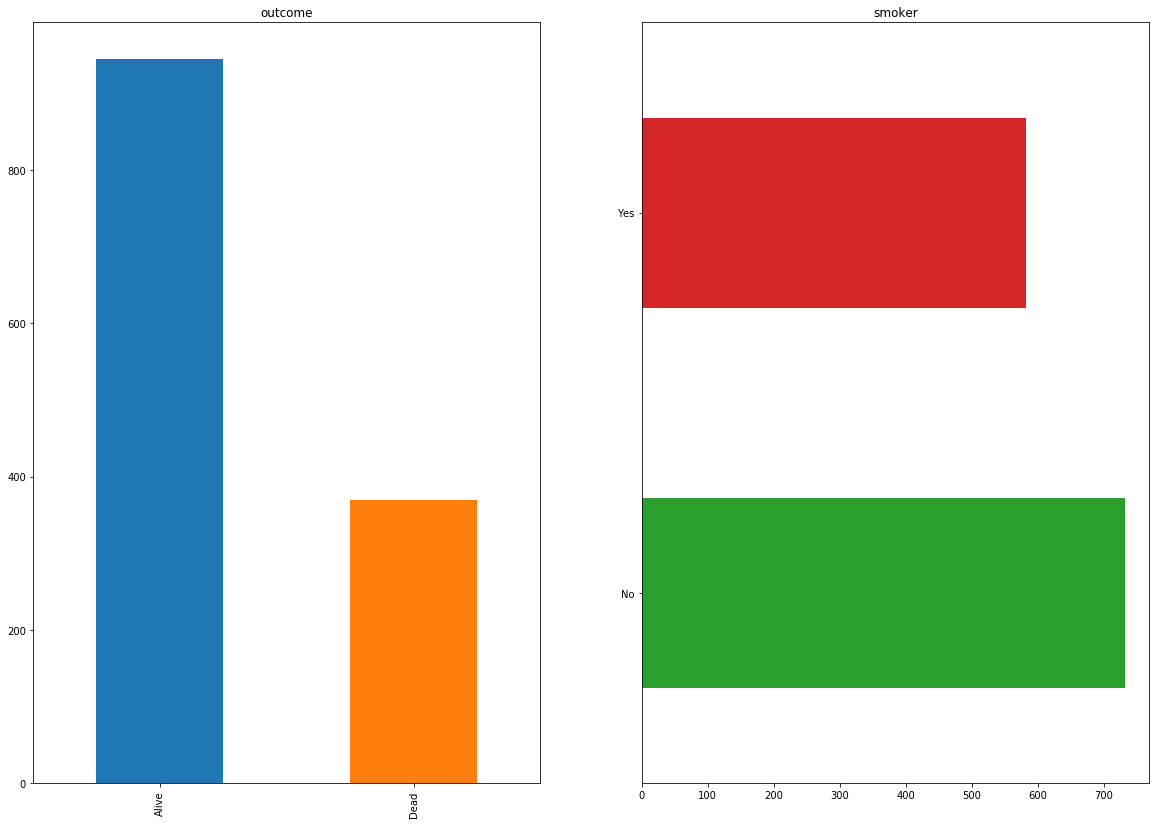

In [13]:
plt.figure(figsize=(20,14)) #size of the figure in terms of rows and columns

''' Subplots have three values:
    first is the rows
    second is the columns
    third is the figure number'''

''' Kind represents the type of graph you want
    Colors represents different colors
    Title displays title of the graph'''



plt.subplot(1,2,1);data.outcome.value_counts().plot(kind='bar', color=['C0', 'C1']); plt.title('outcome')
plt.subplot(1,2,2);data.smoker.value_counts().plot(kind='barh', color=['C2', 'C3']); plt.title('smoker')

#PS. Mention the highest values of rows and columns you are defining in subplot

Text(0.5, 1.0, 'smoker')

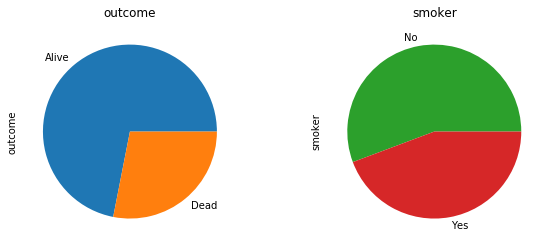

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);data.outcome.value_counts().plot(kind='pie', colors=['C0', 'C1']); plt.title('outcome')
plt.subplot(1,2,2);data.smoker.value_counts().plot(kind='pie', colors=['C2', 'C3']); plt.title('smoker')

In [15]:
#dropping the missing values 
smoking = data.dropna()

In [16]:
smoking.head() #checking the dataset again

,outcome,smoker,age,ageGroup
0,Alive,Yes,23,20-30
1,Alive,Yes,18,0-20
5,Alive,Yes,38,30-40
6,Alive,Yes,45,40-60
8,Alive,No,28,20-30


In [17]:
smoking.describe()

,age
count,971.000000
mean,38.849640
std,12.086119
min,18.000000
25%,29.000000
50%,38.000000
75%,49.000000
max,60.000000


## Histogram

Summary statistics are concise, but dangerous, because they obscure the data. An alternative is to look at the distribution of the data, which describes how often each value appears.

The most common representation of a distribution is a <b> Histogram</b>, which is a graph that shows the frequency or probability of each value.

In this context, frequency means the number of times a value appears in a dataset—it has nothing to do with the pitch of a sound or tuning of a radio signal.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ac3ce48>]],
      dtype=object)

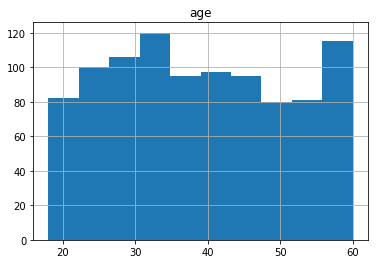

In [18]:
smoking.hist()

To be Continued...